In [1]:
import sys,os

In [2]:
def to_dict(x):
    num,name = x.split(':')
    num = int(num)
    name = name.strip(' ')
    return {num:name}

label_dict={}
with open('/media/external/Downloads/data/pascal/labels.txt','r') as f:
    label_txt=f.read()
    for x in label_txt.split('\n'):
        if len(x) < 1:
            continue
        label_dict.update(to_dict(x))

In [3]:
img_root = '/media/external/Downloads/data/pascal/VOCdevkit/VOC2012/JPEGImages'
label_root = '/media/external/Downloads/data/pascal/trainval'
print(len(os.listdir(img_root)))
print(len(os.listdir(label_root)))

17125
10103


In [4]:
img_list = [x.split('.')[0] for x in os.listdir(img_root)]
label_list = [x.split('.')[0] for x in os.listdir(label_root)]

In [5]:
sample_list = sorted(list(set(img_list).intersection(set(label_list))))

In [11]:
import imageio
import numpy as np
from scipy.io import loadmat

import matplotlib.pyplot as plt
%matplotlib inline

/media/external/Downloads/data/pascal/VOCdevkit/VOC2012/JPEGImages/2008_007527.jpg /media/external/Downloads/data/pascal/trainval/2008_007527.mat
/media/external/Downloads/data/pascal/VOCdevkit/VOC2012/JPEGImages/2008_002533.jpg /media/external/Downloads/data/pascal/trainval/2008_002533.mat
/media/external/Downloads/data/pascal/VOCdevkit/VOC2012/JPEGImages/2008_006063.jpg /media/external/Downloads/data/pascal/trainval/2008_006063.mat
/media/external/Downloads/data/pascal/VOCdevkit/VOC2012/JPEGImages/2009_003819.jpg /media/external/Downloads/data/pascal/trainval/2009_003819.mat
/media/external/Downloads/data/pascal/VOCdevkit/VOC2012/JPEGImages/2008_006939.jpg /media/external/Downloads/data/pascal/trainval/2008_006939.mat
/media/external/Downloads/data/pascal/VOCdevkit/VOC2012/JPEGImages/2010_004773.jpg /media/external/Downloads/data/pascal/trainval/2010_004773.mat


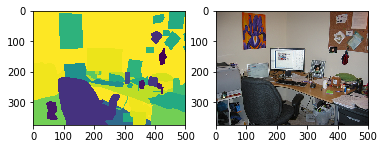

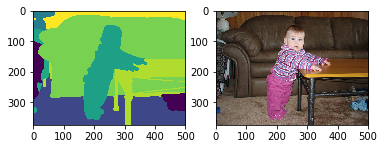

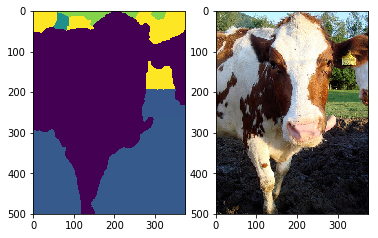

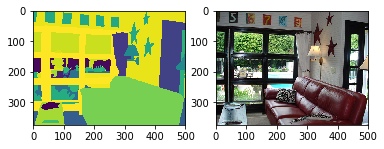

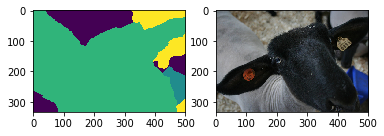

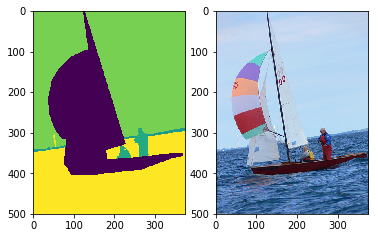

In [13]:
for n,basename in enumerate(sample_list):
    img_basename = basename+'.jpg'
    label_basename = basename+'.mat'
    img_path = os.path.join(img_root,img_basename)
    label_path = os.path.join(label_root,label_basename)
    print(img_path,label_path)

    label = loadmat(label_path)
    im = imageio.imread(img_path)
    plt.figure(n)
    plt.subplot(121)
    plt.imshow(label['LabelMap'])
    plt.subplot(122)
    plt.imshow(im)
    
    if n > 4:
        break